# CSC_5RO11_TA_TP4

## Jupyter Installation

In a Ubuntu terminal run the following:
```bash
pip install matplotlib
pip install numpy
pip install opencv
pip install seaborn
pip install scikit-learn
pip install scikit-learn scikit-image
pip install xgboost
```
This project was created in a WSL2 Ubuntu 24.04 LTS

## Import Packages

Include required packages for TP4.

In [129]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import local_binary_pattern, hog
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Recovery

[FER-2013](https://www.kaggle.com/datasets/msambare/fer2013?resource=download) dataset was used.

In [4]:
output_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output'))
train_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'train'))
test_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'test'))

emotions = os.listdir(train_folder)
print(f'available emotions: {emotions}')

available emotions: ['sad', 'disgust', 'angry', 'surprise', 'happy', 'fear', 'neutral']


In [5]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for emotion in os.listdir(folder):
        emotion_folder = os.path.join(folder, emotion)
        if os.path.isdir(emotion_folder):
            for filename in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, filename)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((48, 48))  # Resize to 48x48 pixels
                img = np.array(img)
                images.append(img)
                labels.append(emotion)
    return images, labels

def extract_lbp_features(images):
    features = []
    for img in images:
        lbp = local_binary_pattern(img, P=8, R=1, method="uniform")
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        lbp_hist = lbp_hist / lbp_hist.sum()  # Normalize the histogram
        features.append(lbp_hist)
    return features


# Load the data from the folders
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)


## Trainning / Testing

## KNN

In [147]:
neighbors = 1
dist_method = 'minkowski'

### LBP without scalling

              precision    recall  f1-score   support

         sad       0.20      0.22      0.21       958
     disgust       0.26      0.30      0.28       111
       angry       0.21      0.20      0.21      1024
    surprise       0.31      0.31      0.31      1774
       happy       0.25      0.24      0.24      1233
        fear       0.21      0.19      0.20      1247
     neutral       0.36      0.37      0.37       831

    accuracy                           0.26      7178
   macro avg       0.26      0.26      0.26      7178
weighted avg       0.26      0.26      0.26      7178



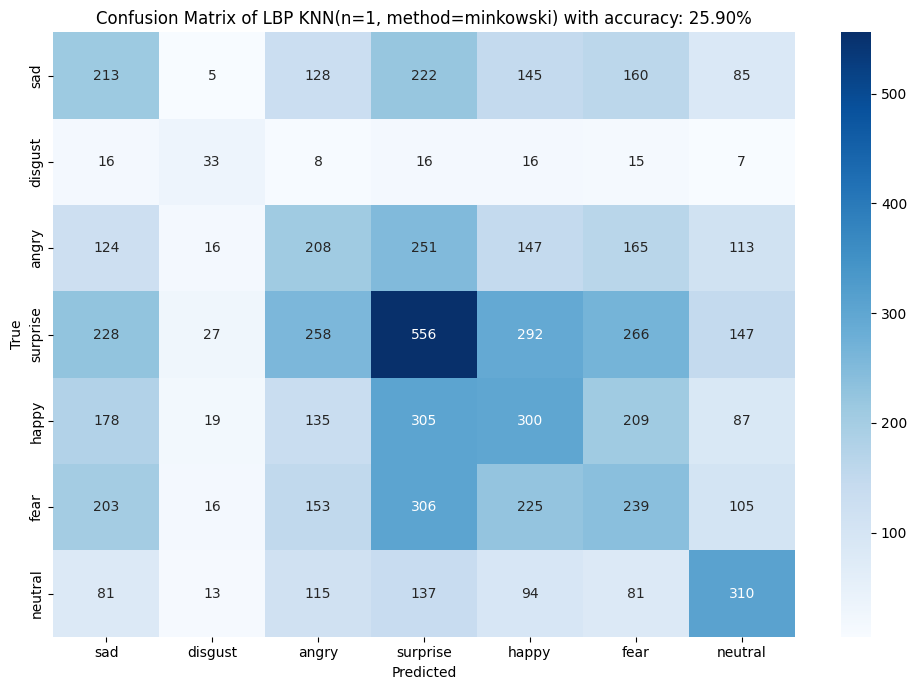

In [148]:
# Extract LBP features
train_features = extract_lbp_features(train_images)
test_features = extract_lbp_features(test_images)

# trainning
knn = KNeighborsClassifier(n_neighbors=neighbors, metric=dist_method)
knn.fit(train_features, y_train)

# testing
y_pred = knn.predict(test_features)

print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of LBP KNN(n={neighbors}, method={dist_method}) with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/KNN_LBP_{neighbors}_{dist_method}.png', dpi=300)
plt.show()

### LBP with scalling

              precision    recall  f1-score   support

         sad       0.21      0.23      0.22       958
     disgust       0.29      0.29      0.29       111
       angry       0.20      0.20      0.20      1024
    surprise       0.31      0.31      0.31      1774
       happy       0.22      0.22      0.22      1233
        fear       0.22      0.19      0.21      1247
     neutral       0.36      0.38      0.37       831

    accuracy                           0.26      7178
   macro avg       0.26      0.26      0.26      7178
weighted avg       0.25      0.26      0.25      7178



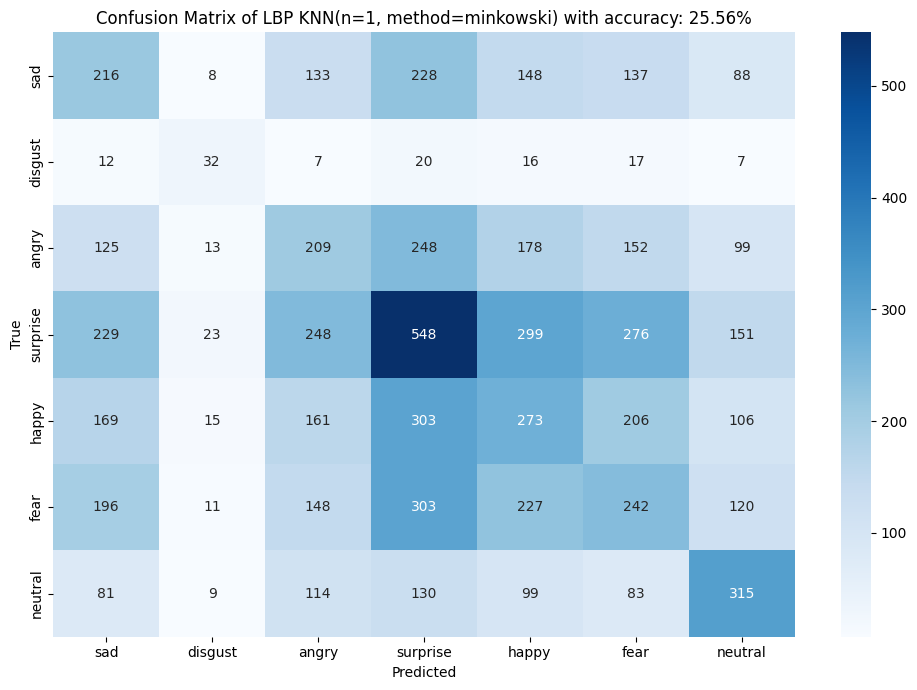

In [149]:
# Extract LBP features
train_features = extract_lbp_features(train_images)
test_features = extract_lbp_features(test_images)

# Feature Scalling
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)


# trainning
knn = KNeighborsClassifier(n_neighbors=neighbors, metric=dist_method)
knn.fit(train_features_scaled, y_train)

# testing
y_pred = knn.predict(test_features_scaled)

print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of LBP KNN(n={neighbors}, method={dist_method}) with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/KNN_LBP_{neighbors}_{dist_method}_scalled.png', dpi=300)
plt.show()

### HOG without scalling

              precision    recall  f1-score   support

         sad       0.44      0.40      0.42       958
     disgust       0.65      0.66      0.65       111
       angry       0.50      0.43      0.46      1024
    surprise       0.59      0.67      0.63      1774
       happy       0.41      0.46      0.43      1233
        fear       0.47      0.36      0.40      1247
     neutral       0.62      0.68      0.65       831

    accuracy                           0.51      7178
   macro avg       0.52      0.52      0.52      7178
weighted avg       0.51      0.51      0.51      7178



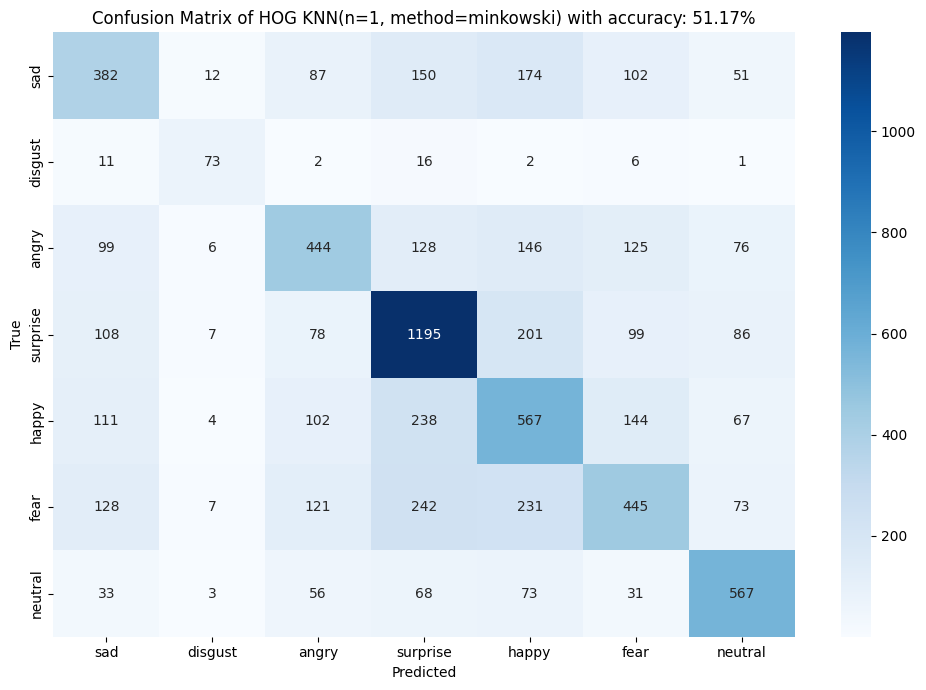

In [150]:
def extract_hog_features(images):
    features = []
    for img in images:
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_features)
    return features

train_features_hog = extract_hog_features(train_images)
test_features_hog = extract_hog_features(test_images)


# trainning
knn = KNeighborsClassifier(n_neighbors=neighbors, metric=dist_method)
knn.fit(train_features_hog, y_train)

# testing
y_pred = knn.predict(test_features_hog)


print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of HOG KNN(n={neighbors}, method={dist_method}) with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/KNN_HOG_{neighbors}_{dist_method}.png', dpi=300)
plt.show()

### HOG with scalling

              precision    recall  f1-score   support

         sad       0.21      0.23      0.22       958
     disgust       0.29      0.29      0.29       111
       angry       0.20      0.20      0.20      1024
    surprise       0.31      0.31      0.31      1774
       happy       0.22      0.22      0.22      1233
        fear       0.22      0.19      0.21      1247
     neutral       0.36      0.38      0.37       831

    accuracy                           0.26      7178
   macro avg       0.26      0.26      0.26      7178
weighted avg       0.25      0.26      0.25      7178



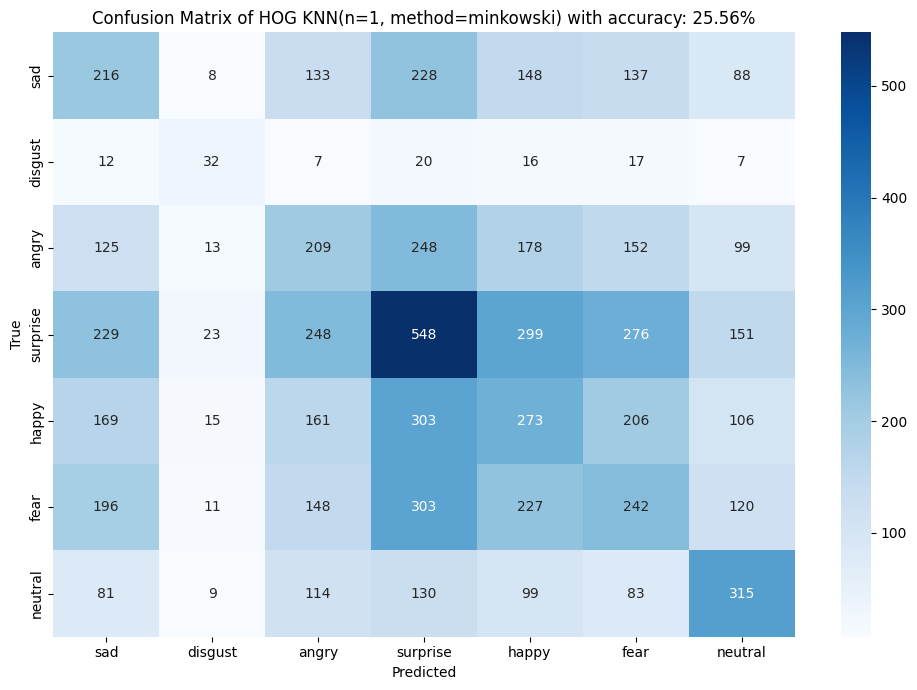

In [151]:
def extract_hog_features(images):
    features = []
    for img in images:
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_features)
    return features

train_features_hog = extract_hog_features(train_images)
test_features_hog = extract_hog_features(test_images)

# Feature Scalling
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)


# trainning
knn = KNeighborsClassifier(n_neighbors=neighbors, metric=dist_method)
knn.fit(train_features_scaled, y_train)

# testing
y_pred = knn.predict(test_features_scaled)


print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of HOG KNN(n={neighbors}, method={dist_method}) with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/KNN_HOG_{neighbors}_{dist_method}_scalled.png', dpi=300)
plt.show()

## XGBoost

### XGBoost with LBP

              precision    recall  f1-score   support

         sad       0.25      0.12      0.16       958
     disgust       0.84      0.14      0.25       111
       angry       0.23      0.11      0.15      1024
    surprise       0.29      0.60      0.39      1774
       happy       0.23      0.19      0.20      1233
        fear       0.24      0.17      0.20      1247
     neutral       0.41      0.31      0.35       831

    accuracy                           0.28      7178
   macro avg       0.36      0.24      0.24      7178
weighted avg       0.28      0.28      0.25      7178



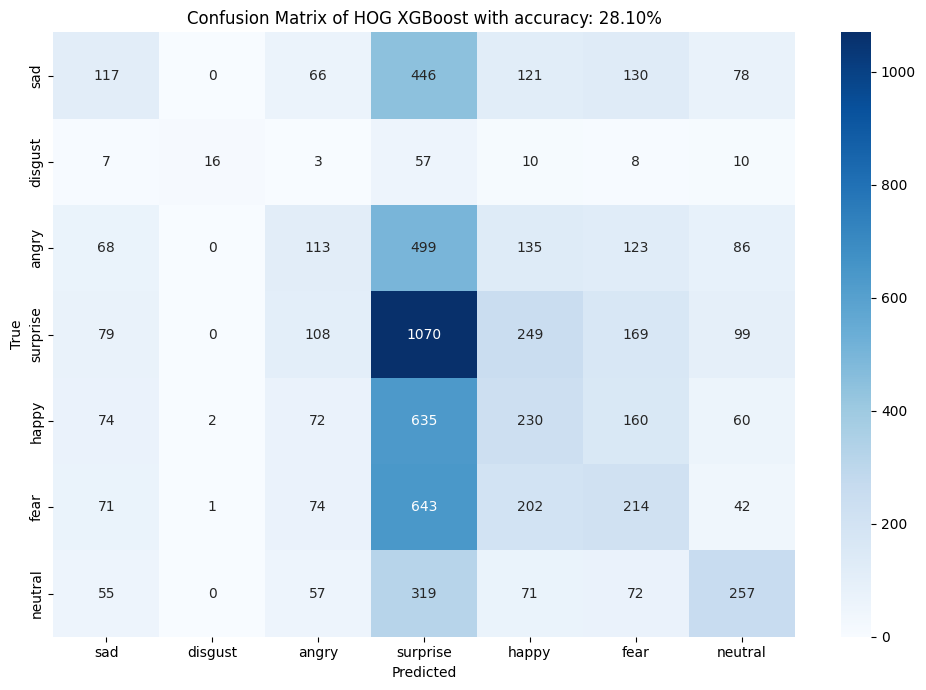

In [154]:
train_features = extract_lbp_features(train_images)
test_features = extract_lbp_features(test_images)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_features, y_train)
y_pred = xgb_model.predict(test_features)


print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of HOG XGBoost with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/XGB_LBP.png', dpi=300)
plt.show()

### XGBoost with HOG

              precision    recall  f1-score   support

         sad       0.40      0.33      0.36       958
     disgust       1.00      0.27      0.43       111
       angry       0.41      0.33      0.37      1024
    surprise       0.60      0.78      0.68      1774
       happy       0.44      0.48      0.46      1233
        fear       0.38      0.37      0.38      1247
     neutral       0.73      0.59      0.65       831

    accuracy                           0.50      7178
   macro avg       0.57      0.45      0.47      7178
weighted avg       0.50      0.50      0.49      7178



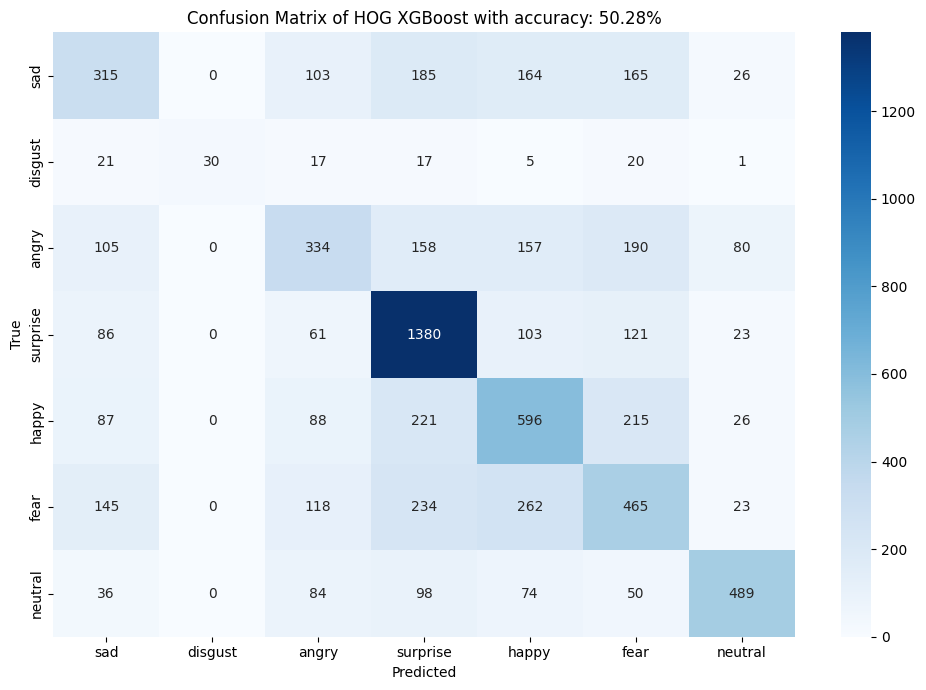

In [152]:
import xgboost as xgb


def extract_hog_features(images):
    features = []
    for img in images:
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_features)
    return features

train_features_hog = extract_hog_features(train_images)
test_features_hog = extract_hog_features(test_images)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_features_hog, y_train)
y_pred = xgb_model.predict(test_features_hog)


print(classification_report(y_test, y_pred, target_names=emotions))

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of HOG XGBoost with accuracy: {accuracy*100:2.2f}%')
plt.tight_layout()
plt.savefig(f'{output_folder}/XGB_HOG.png', dpi=300)
plt.show()

# Analysis

## Results
Two methods were tested: KNN and XGBoost, with the results presented below:
| Method | Features | Scalled | n | distance | Accuracy |
| - | - | - | - | - | - |
| KNN | HOG | yes | 1 | minkowski | 25.56% |
| KNN | HOG | no  | 1 | minkowski | **51.17%** |
| KNN | HOG | yes | 5 | minkowski | 22.50% |
| KNN | HOG | no  | 5 | minkowski | 46.71% |
| KNN | LBP | yes | 1 | minkowski | 25.56% |
| KNN | LBP | no  | 1 | minkowski | **25.90%** |
| KNN | LBP | yes | 5 | minkowski | 22.50% |
| KNN | LBP | no  | 5 | minkowski | 22.19% |
| XGBoost | HOG | no | - | - | **50.28%** |
| XGBoost | LBP | no | - | - | 28.10% |

Where:
- n: number of neighbours of KNN;
- distance: method of computing distance of KNN;

It is noticeable that the choice of feature extraction method heavily influences the results: **HOG** (Histogram of Oriented Gradients) consistently delivers better performance with both KNN and XGBoost, while **LBP** (Local Binary Patterns) performs significantly worse. This discrepancy can be explained by the nature of the features each method captures. LBP captures local textures, while HOG focuses on edge orientation and shape, which are more important for recognizing facial expressions.

It is also worth noting that scaling the features reduced the accuracy of both methods. While scaling is generally important for algorithms like KNN, SVMs, or Logistic Regression—especially those relying on distance calculations or gradient-based optimization—it can be less beneficial in image-related tasks. In this case, pixel values represent spatial information, and scaling may disrupt the critical relationships between neighboring pixels.

### KNN with HOG without scalling

The best result obtained during testing is shown below:
![alt text](../output/KNN_HOG_1_minkowski.png)

It is noticeable that surprise is the easiest emotion to classify, while disgust is the hardest. Surprise is often distinguished due to exaggerated facial expressions, whereas disgust tends to rely on micro-expressions, making it difficult to identify in small images like those used in this project.

